##  Liquidity's Ratio Comparison


#### Importing Dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

#### API login

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [3]:
def getCurrentData(companies_symbols_list, category):
    companies_list_data = []
    for company_symbol in companies_symbols_list:
        time.sleep(0.1)
        companies_list_data.append(te.getHistoricalFinancials(symbol=company_symbol, category=category, output_type='df'))
        
    return companies_list_data

def calculateLiquidity(companies_list_assets, companies_list_liabilities):
    companies_list_liquidity = []
    counter = 0
    for company_assets in companies_list_assets:
        companies_list_liquidity.append(company_assets['value'] / companies_list_liabilities[counter]['value'])
        counter +=1
    return companies_list_liquidity

def getX_Axis_list(companies_list_assets):
    x_axis_list = []
    for company_assets1 in companies_list_assets:

        company_assets = company_assets1['date']
        company_assets = (pd.to_datetime(company_assets, format='%Y-%m-%d'))

        x_axis_list.append(company_assets)
    return x_axis_list

def plotLiquidity(companies_list_assets, companies_list_liquidity, companies_symbols_list):
    fix, ax5 = plt.subplots(figsize=(15,5))
    
    x_axis_list = getX_Axis_list(companies_list_assets)

    counter = 0
    for company_liquidity in companies_list_liquidity:
        ax5.plot(x_axis_list[counter], company_liquidity, label=companies_symbols_list[counter])
        counter +=1
    
    ax5.set_title("Liquidity Ratio")
    plt.style.use('bmh')
    ax5.legend()

def getLiquidityRatio(companies_symbols_list):
    
    companies_list_assets = getCurrentData(companies_symbols_list, 'current-assets') 
    companies_list_liabilities = getCurrentData(companies_symbols_list, 'current-liabilities')
    companies_list_liquidity = calculateLiquidity(companies_list_assets, companies_list_liabilities)
    
    plotLiquidity(companies_list_assets, companies_list_liquidity, companies_symbols_list)

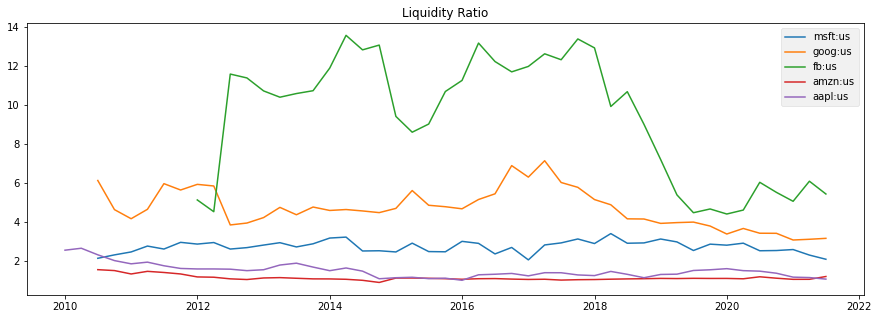

In [4]:
getLiquidityRatio(['msft:us', 'goog:us', 'fb:us', 'amzn:us', 'aapl:us'])